In [2]:
import tushare as ts
token = '6feca07b866ea55bd6024aa5a8891d7bc11afd829d1386c8a2fc8d89'
# initial
pro = ts.pro_api(token)

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import datetime
import pandas as pd
import numpy as np
from scipy import stats
import time

In [110]:
hs300 = 'http://www.csindex.com.cn/uploads/file/autofile/cons/000300cons.xls'
energy300 = 'http://www.csindex.com.cn/uploads/file/autofile/cons/000908cons.xls'
material300 = 'http://www.csindex.com.cn/uploads/file/autofile/cons/000909cons.xls'
industiral300 = 'http://www.csindex.com.cn/uploads/file/autofile/cons/000910cons.xls'
sconsume300 = 'http://www.csindex.com.cn/uploads/file/autofile/cons/000911cons.xls'
nconsume300 = 'http://www.csindex.com.cn/uploads/file/autofile/cons/000912cons.xls'
medical300 = 'http://www.csindex.com.cn/uploads/file/autofile/cons/000913cons.xls'
finance300 = 'http://www.csindex.com.cn/uploads/file/autofile/cons/000914cons.xls'
it300 = 'http://www.csindex.com.cn/uploads/file/autofile/cons/000915cons.xls'
telecom300 = 'http://www.csindex.com.cn/uploads/file/autofile/cons/000916cons.xls'
utility300 = 'http://www.csindex.com.cn/uploads/file/autofile/cons/000917cons.xls'

In [117]:
import requests
dls = energy300
resp = requests.get(dls)
with open('cons.xls', 'wb') as output:
    output.write(resp.content)
df = pd.read_excel('cons.xls')

In [122]:
df.tail()

,日期Date,指数代码Index Code,指数名称Index Name,指数英文名称Index Name(Eng.),成分券代码Constituent Code,成分券名称Constituent Name,成分券英文名称Constituent Name(Eng.),交易所Exchange
7,2019-02-22,908,300能源,CSI 300 Energy,601225,陕西煤业,Shaanxi Coal Industry Company Limited,SHH
8,2019-02-22,908,300能源,CSI 300 Energy,601808,中海油服,China Oilfield Services Limited,SHH
9,2019-02-22,908,300能源,CSI 300 Energy,601857,中国石油,PetroChina Co Ltd,SHH
10,2019-02-22,908,300能源,CSI 300 Energy,601898,中煤能源,China Coal Energy Co Ltd,SHH
11,2019-02-22,908,300能源,CSI 300 Energy,983,西山煤电,Shanxi Xishan Coal And Electricity Power Co Ltd,SHZ


In [164]:
# index compose
cs = []
cons_col = '成分券代码Constituent Code'
ex_col = '交易所Exchange'
for n in df[cons_col].values:
    e=df[df[cons_col]==n][ex_col].values
    if (e=='SHZ'):
        cs.append('{0:0{width}}'.format(n, width=6)+'.SZ')
    else:
        cs.append('{0:0{width}}'.format(n, width=6)+'.SH')
for c in cs:
    print(c)

600028.SH
600157.SH
600188.SH
600339.SH
600583.SH
600688.SH
601088.SH
601225.SH
601808.SH
601857.SH
601898.SH
000983.SZ


In [165]:
index_code = '399300.SZ'

In [166]:
# index daily price
time_spread = 10 # Years
t = datetime.date.today()
end_date = t
start_date = datetime.datetime(t.year - time_spread, t.month, t.day)
end_date_str = end_date.strftime("%Y%m%d")
start_date_str = start_date.strftime("%Y%m%d")
p_t = ['trade_date'] #, 'open', 'high', 'low', 'close']
price = pro.index_daily(ts_code=index_code, start_date=start_date_str, end_date=end_date_str)
p = price[p_t]

In [5]:
# compose and weight %
t = datetime.date.today()
start_date = datetime.datetime(t.year, t.month, 1)
start_date_str = start_date.strftime("%Y%m%d")
end_date_str = t.strftime("%Y%m%d")
etf300 = pro.index_weight(index_code=index_code, start_date=start_date_str, end_date=end_date_str)

In [167]:
r_t = 'ts_code,trade_date,pe,pb,circ_mv,total_mv'

In [90]:
#cs = ['000157.SZ','000069.SZ','000063.SZ','000002.SZ','000001.SZ']
#cs = etf300['con_code'].values

In [91]:
# copy selected columns to new df
# df1 = df[['trade_date','circ_mv']]

In [168]:
i=0
mv = 'circ_mv'
r = 'pe'
p_mv = p.copy(deep=True)
p_r = p.copy(deep=True)
for c in cs:
    df = pro.daily_basic(ts_code=c, start_date=start_date_str, end_date=end_date_str, fields=r_t)
    df_mv = df[['trade_date',mv]]
    p_mv = pd.merge(p_mv,df_mv,how='left')
    p_mv = p_mv.rename({mv:c}, axis=1)
    df_r = df[['trade_date',r]]
    p_r = pd.merge(p_r,df_r,how='left')
    p_r = p_r.rename({r:c}, axis=1)
    time.sleep(0.3)
    i=i+1
    if(i%20==0):
        print(i)

In [169]:
p_mv.fillna(method='ffill', inplace=True)
p_mv = p_mv.sort_values(by='trade_date')
p_mv['trade_date'] = pd.to_datetime(p_mv['trade_date'])
p_mv.set_index("trade_date", inplace=True)

In [181]:
p_mv.tail()

,600028.SH,600157.SH,600188.SH,600339.SH,600583.SH,600688.SH,601088.SH,601225.SH,601808.SH,601857.SH,601898.SH,000983.SZ
trade_date,,,,,,,,,,,,
2019-02-18,5.637908e+07,2.435456e+06,2.788206e+06,636394.0714,2.551122e+06,3.876942e+06,3.296558e+07,8300000.0,2676263.072,1.225750e+08,4.402112e+06,1.811939e+06
2019-02-19,5.618797e+07,2.410604e+06,2.764527e+06,651915.8780,2.573228e+06,3.869614e+06,3.255331e+07,8210000.0,2691065.412,1.228989e+08,4.392960e+06,1.808787e+06
2019-02-20,5.637908e+07,2.497585e+06,2.832605e+06,644154.9747,2.515751e+06,3.862285e+06,3.301506e+07,8400000.0,2696986.348,1.227369e+08,4.457024e+06,1.849753e+06
2019-02-21,5.609241e+07,2.659120e+06,2.788206e+06,661228.9620,2.498065e+06,3.832969e+06,3.275120e+07,8380000.0,2655539.796,1.217654e+08,4.402112e+06,1.827695e+06
2019-02-22,5.618797e+07,2.596991e+06,2.823725e+06,670542.0460,2.542279e+06,3.862285e+06,3.233893e+07,8490000.0,2688104.944,1.225750e+08,4.438720e+06,1.849753e+06


In [171]:
w = p_mv.sum(axis=1)
w = w.values
w=p_mv.div(w,axis=0)

In [172]:
w.tail()

,600028.SH,600157.SH,600188.SH,600339.SH,600583.SH,600688.SH,601088.SH,601225.SH,601808.SH,601857.SH,601898.SH,000983.SZ
trade_date,,,,,,,,,,,,
2019-02-18,0.233552,0.010089,0.011550,0.002636,0.010568,0.016060,0.136561,0.034383,0.011087,0.507771,0.018236,0.007506
2019-02-19,0.233133,0.010002,0.011470,0.002705,0.010677,0.016056,0.135069,0.034065,0.011166,0.509927,0.018227,0.007505
2019-02-20,0.233080,0.010325,0.011710,0.002663,0.010401,0.015967,0.136489,0.034727,0.011150,0.507414,0.018426,0.007647
2019-02-21,0.233413,0.011065,0.011602,0.002752,0.010395,0.015950,0.136285,0.034871,0.011050,0.506693,0.018318,0.007605
2019-02-22,0.233083,0.010773,0.011714,0.002782,0.010546,0.016022,0.134151,0.035219,0.011151,0.508474,0.018413,0.007673


In [174]:
w.sum(axis=1)

trade_date
2009-02-23    1.0
2009-02-24    1.0
2009-02-25    1.0
2009-02-26    1.0
2009-02-27    1.0
2009-03-02    1.0
2009-03-03    1.0
2009-03-04    1.0
2009-03-05    1.0
2009-03-06    1.0
2009-03-09    1.0
2009-03-10    1.0
2009-03-11    1.0
2009-03-12    1.0
2009-03-13    1.0
2009-03-16    1.0
2009-03-17    1.0
2009-03-18    1.0
2009-03-19    1.0
2009-03-20    1.0
2009-03-23    1.0
2009-03-24    1.0
2009-03-25    1.0
2009-03-26    1.0
2009-03-27    1.0
2009-03-30    1.0
2009-03-31    1.0
2009-04-01    1.0
2009-04-02    1.0
2009-04-03    1.0
             ... 
2019-01-07    1.0
2019-01-08    1.0
2019-01-09    1.0
2019-01-10    1.0
2019-01-11    1.0
2019-01-14    1.0
2019-01-15    1.0
2019-01-16    1.0
2019-01-17    1.0
2019-01-18    1.0
2019-01-21    1.0
2019-01-22    1.0
2019-01-23    1.0
2019-01-24    1.0
2019-01-25    1.0
2019-01-28    1.0
2019-01-29    1.0
2019-01-30    1.0
2019-01-31    1.0
2019-02-01    1.0
2019-02-11    1.0
2019-02-12    1.0
2019-02-13    1.0
2019-02-14    1.0

In [175]:
p_r.fillna(method='ffill', inplace=True)
p_r = p_r.sort_values(by='trade_date')
p_r['trade_date'] = pd.to_datetime(p_r['trade_date'])
p_r.set_index("trade_date", inplace=True)

In [176]:
p_r.tail()

,600028.SH,600157.SH,600188.SH,600339.SH,600583.SH,600688.SH,601088.SH,601225.SH,601808.SH,601857.SH,601898.SH,000983.SZ
trade_date,,,,,,,,,,,,
2019-02-18,13.9737,40.4328,6.8341,34.1652,51.9518,9.3230,8.8282,7.9430,1304.4751,60.7848,26.4138,11.5476
2019-02-19,13.9263,40.0203,6.7761,34.9985,52.4020,9.3054,8.7177,7.8569,1311.6901,60.9454,26.3589,11.5275
2019-02-20,13.9737,41.4643,6.9429,34.5819,51.2315,9.2878,8.8414,8.0387,1314.5761,60.8651,26.7433,11.7886
2019-02-21,13.9026,44.1461,6.8341,35.4985,50.8713,9.2173,8.7707,8.0196,1294.3741,60.3834,26.4138,11.6480
2019-02-22,13.9263,43.1146,6.9212,35.9985,51.7717,9.2878,8.6603,8.1249,1310.2471,60.7848,26.6335,11.7886


In [177]:
p_rsum = pd.DataFrame(p_r.values*w.values, columns=p_r.columns, index=p_r.index).sum(axis=1)

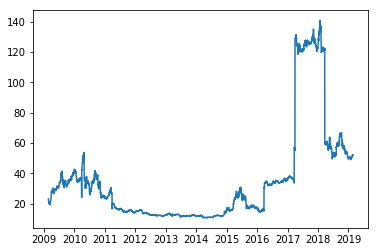

In [179]:
plt.plot(p_rsum)

In [180]:
p_rsum.tail()

trade_date
2019-02-18    51.913181
2019-02-19    52.263882
2019-02-20    52.149514
2019-02-21    51.532791
2019-02-22    52.133310
dtype: float64

In [182]:
df = pro.daily_basic(ts_code='601808.SH', fields='ts_code,trade_date,turnover_rate,volume_ratio,pe,pb')

In [183]:
df

,ts_code,trade_date,turnover_rate,volume_ratio,pe,pb
0,601808.SH,20190222,0.1528,0.84,1310.2471,1.2673
1,601808.SH,20190221,0.1833,1.00,1294.3741,1.2520
2,601808.SH,20190220,0.1477,0.72,1314.5761,1.2715
3,601808.SH,20190219,0.1953,1.03,1311.6901,1.2687
4,601808.SH,20190218,0.2249,1.37,1304.4751,1.2617
5,601808.SH,20190215,0.1600,1.06,1275.6150,1.2338
6,601808.SH,20190214,0.1841,1.32,1278.5010,1.2366
7,601808.SH,20190213,0.2594,2.39,1282.8301,1.2408
8,601808.SH,20190212,0.1151,1.03,1269.8430,1.2282
9,601808.SH,20190211,0.1031,0.90,1261.1850,1.2199
